In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [2]:
avg_110, t_el, ql_dyn, ql_sta = process_group(group='E0110', 
                                              # prefix='/data/xpcs8/2022-1/babnigg202203/cluster_results_reanalysis',
                                              prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                              zone_idx='auto',
                                              num_cores=24)

2023-12-09 17:03:39,723 utils                   : total number of files in E0110  is 1196
2023-12-09 17:03:49,771 utils                   : label='E0110_section_03': remove 15 datasets out of 120
2023-12-09 17:03:49,816 utils                   : label='E0110_section_02': remove 14 datasets out of 120
2023-12-09 17:03:49,871 utils                   : label='E0110_section_05': remove 16 datasets out of 120
2023-12-09 17:03:49,903 utils                   : label='E0110_section_01': remove 13 datasets out of 120
2023-12-09 17:03:50,047 utils                   : label='E0110_section_08': remove 15 datasets out of 119
2023-12-09 17:03:50,048 utils                   : label='E0110_section_04': remove 14 datasets out of 120
2023-12-09 17:03:50,057 utils                   : label='E0110_section_00': remove 17 datasets out of 120
2023-12-09 17:03:50,181 utils                   : label='E0110_section_06': remove 16 datasets out of 119
2023-12-09 17:03:50,308 utils                   : label='E0110

In [3]:
avg_111, _, _, _ = process_group(group='E0111', 
                                 prefix='/home/8ididata/2022-1/babnigg202203/cluster_results_reanalysis',
                                 zone_idx='auto',
                                 num_cores=24)

2023-12-09 17:03:51,347 utils                   : total number of files in E0111  is 1197
2023-12-09 17:04:01,506 utils                   : label='E0111_section_03': remove 14 datasets out of 120
2023-12-09 17:04:01,508 utils                   : label='E0111_section_04': remove 14 datasets out of 120
2023-12-09 17:04:01,509 utils                   : label='E0111_section_02': remove 15 datasets out of 120
2023-12-09 17:04:01,631 utils                   : label='E0111_section_07': remove 15 datasets out of 119
2023-12-09 17:04:01,752 utils                   : label='E0111_section_06': remove 15 datasets out of 120
2023-12-09 17:04:01,758 utils                   : label='E0111_section_01': remove 14 datasets out of 120
2023-12-09 17:04:01,812 utils                   : label='E0111_section_05': remove 16 datasets out of 120
2023-12-09 17:04:01,938 utils                   : label='E0111_section_00': remove 14 datasets out of 120
2023-12-09 17:04:01,976 utils                   : label='E0111

In [4]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

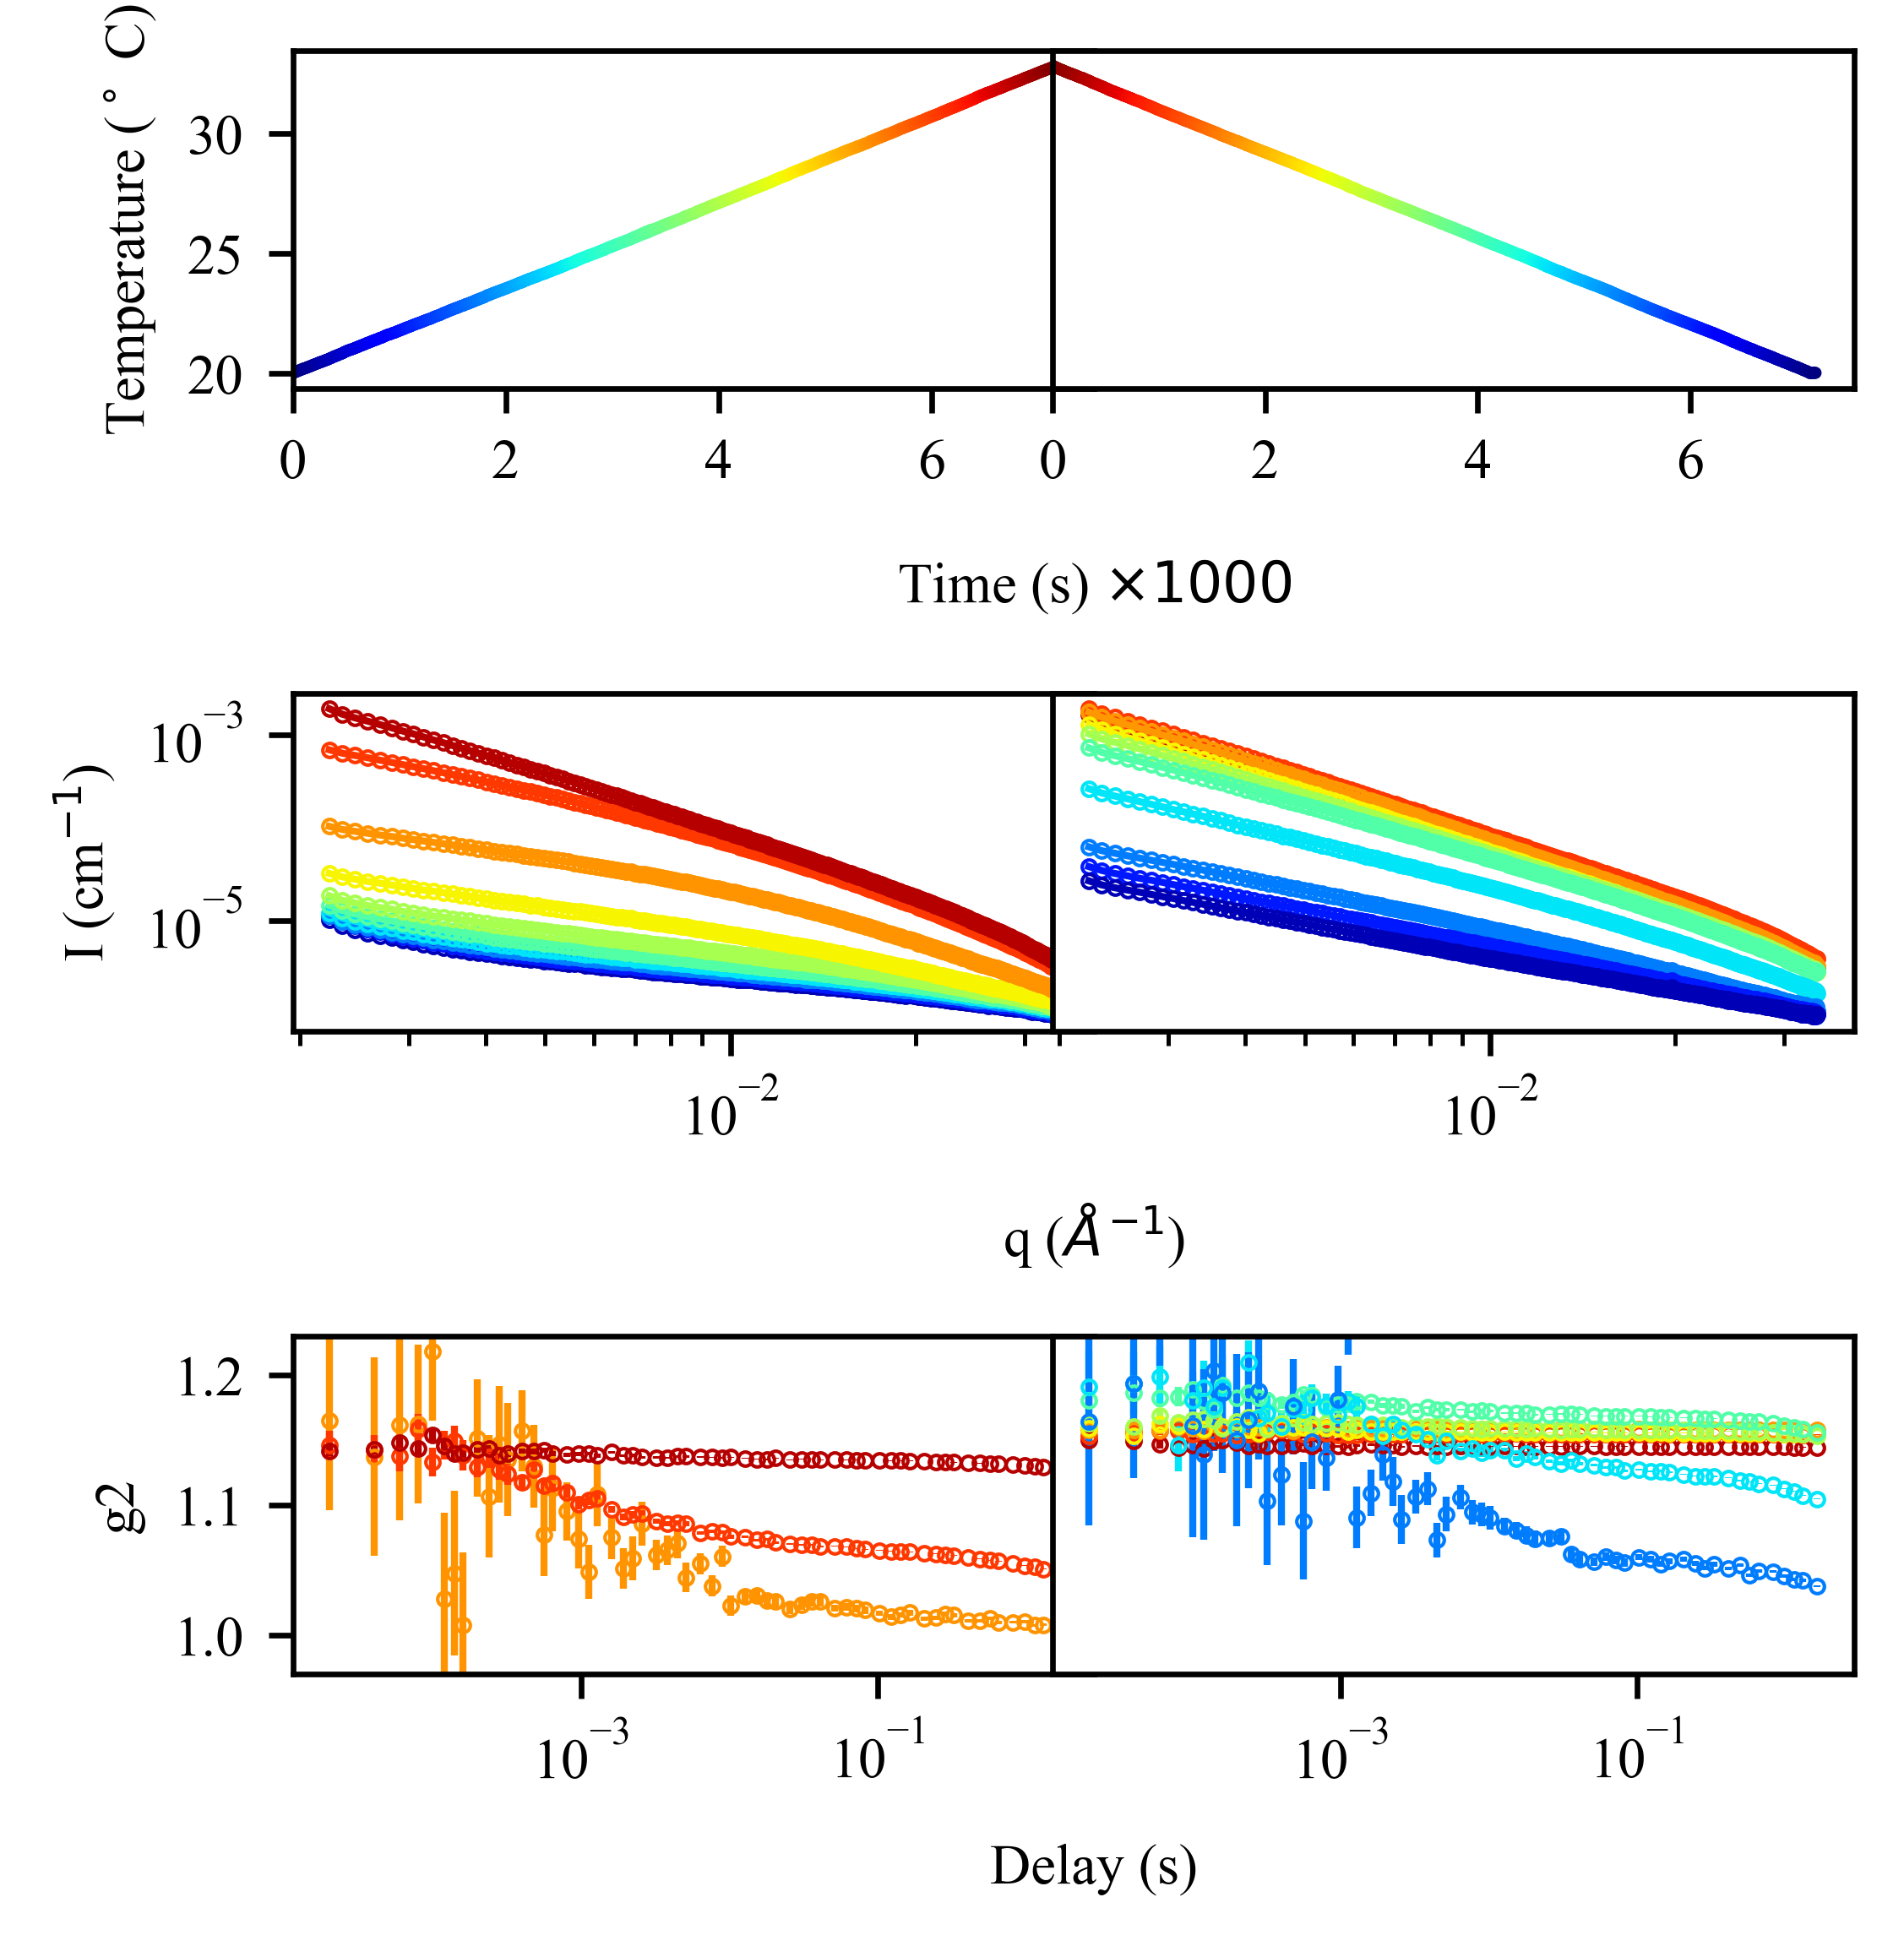

In [5]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600


fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)



def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size
        # print(idx.shape, np.min(idx), np.max(idx))
        # ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'], color=idx, cmap=plt.cm.jet)
        
        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], c=cmap(idx), s=0.5)

        color = cmap(np.mean(idx))
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o-', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        
        # ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', color=color, lw=1, ms=2, mew=0.5, mfc='none')
        g2_line = avg_dict['g2'][:, g2_idx]
        if np.sum((g2_line > 1.2) | (g2_line < 0.9)) < 5:
            ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx],  yerr=avg_dict['g2_err'][:, g2_idx],
                           fmt='o', color=color, lw=1, ms=2, mew=0.5, mfc='none')
            ax[2].set_ylim(0.97, 1.23)
        # x, y, yerr=None, xerr=None, fmt='', ecolor=None,
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s) $\\times 1000$')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Delay (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')

plot_one_column(ax[:, 0], avg_110)
plot_one_column(ax[:, 1], avg_111, second_column=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('figure3.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()

In [6]:
print(t_el)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.003
 0.003 0.004 0.004 0.005 0.006 0.008 0.009 0.01  0.013 0.015 0.018 0.02
 0.026 0.031 0.036 0.041 0.051 0.061 0.072 0.082 0.102 0.123 0.143 0.164
 0.205 0.246 0.287 0.328 0.41  0.492 0.573 0.655 0.819 0.983 1.147 1.311
 1.638]
